In this analysis the topmost 100 durations of trips  between stations are plotted as a network graph and based on the plot , the trips are categorised based on the duration of the trips and are highlighted.  

Data source : https://www.kaggle.com/benhamner/sf-bay-area-bike-share/version/2

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
from networkx.algorithms.distance_measures import eccentricity, radius , diameter , center
from networkx.algorithms.shortest_paths.generic import all_shortest_paths , shortest_path_length

In [3]:
trip_summary = pd.read_csv("trip_summary.csv")
station = pd.read_csv("station.csv")

In [4]:
trip_summary.head()

,start_station_id,end_station_id,n_trips,duration
0,2,2,191,1724363
1,2,3,448,258472
2,2,4,2200,638922
3,2,5,627,365842
4,2,6,1274,570710


In [5]:
trip_summary.shape

(1751, 4)

In [6]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


Select the top 100 durations between stations.  

In [8]:
max_durations = trip_summary.copy()
max_durations = max_durations.sort_values(['duration'] , ascending = False)[:100]
max_durations

,start_station_id,end_station_id,n_trips,duration
1268,66,62,111,17367175
762,50,50,1733,10819388
1054,60,60,2092,9209028
425,35,35,894,8264042
770,50,60,6164,7793685
...,...,...,...,...
1599,75,75,325,1399372
692,48,50,731,1396426
1399,70,48,1288,1382065
498,39,69,2854,1381926


Get the station names.  

In [9]:
max_durations = max_durations.merge(station[['id', 'name']] , how = 'left', left_on = 'start_station_id',right_on = 'id' )
max_durations.rename(columns = {'name' : 'start_station_name'}, inplace = True)
max_durations

,start_station_id,end_station_id,n_trips,duration,id,start_station_name
0,66,62,111,17367175,66,South Van Ness at Market
1,50,50,1733,10819388,50,Harry Bridges Plaza (Ferry Building)
2,60,60,2092,9209028,60,Embarcadero at Sansome
3,35,35,894,8264042,35,University and Emerson
4,50,60,6164,7793685,50,Harry Bridges Plaza (Ferry Building)
...,...,...,...,...,...,...
95,75,75,325,1399372,75,Mechanics Plaza (Market at Battery)
96,48,50,731,1396426,48,Embarcadero at Vallejo
97,70,48,1288,1382065,70,San Francisco Caltrain (Townsend at 4th)
98,39,69,2854,1381926,39,Powell Street BART


In [10]:
max_durations = max_durations.merge(station[['id', 'name']] , how = 'left', left_on = 'end_station_id',right_on = 'id' )
max_durations.rename(columns = {'name' : 'end_station_name'}, inplace = True)
max_durations

,start_station_id,end_station_id,n_trips,duration,id_x,start_station_name,id_y,end_station_name
0,66,62,111,17367175,66,South Van Ness at Market,62,2nd at Folsom
1,50,50,1733,10819388,50,Harry Bridges Plaza (Ferry Building),50,Harry Bridges Plaza (Ferry Building)
2,60,60,2092,9209028,60,Embarcadero at Sansome,60,Embarcadero at Sansome
3,35,35,894,8264042,35,University and Emerson,35,University and Emerson
4,50,60,6164,7793685,50,Harry Bridges Plaza (Ferry Building),60,Embarcadero at Sansome
...,...,...,...,...,...,...,...,...
95,75,75,325,1399372,75,Mechanics Plaza (Market at Battery),75,Mechanics Plaza (Market at Battery)
96,48,50,731,1396426,48,Embarcadero at Vallejo,50,Harry Bridges Plaza (Ferry Building)
97,70,48,1288,1382065,70,San Francisco Caltrain (Townsend at 4th),48,Embarcadero at Vallejo
98,39,69,2854,1381926,39,Powell Street BART,69,San Francisco Caltrain 2 (330 Townsend)


In [11]:
max_durations.drop(['id_x','id_y'], axis = 1, inplace = True)
max_durations

,start_station_id,end_station_id,n_trips,duration,start_station_name,end_station_name
0,66,62,111,17367175,South Van Ness at Market,2nd at Folsom
1,50,50,1733,10819388,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building)
2,60,60,2092,9209028,Embarcadero at Sansome,Embarcadero at Sansome
3,35,35,894,8264042,University and Emerson,University and Emerson
4,50,60,6164,7793685,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome
...,...,...,...,...,...,...
95,75,75,325,1399372,Mechanics Plaza (Market at Battery),Mechanics Plaza (Market at Battery)
96,48,50,731,1396426,Embarcadero at Vallejo,Harry Bridges Plaza (Ferry Building)
97,70,48,1288,1382065,San Francisco Caltrain (Townsend at 4th),Embarcadero at Vallejo
98,39,69,2854,1381926,Powell Street BART,San Francisco Caltrain 2 (330 Townsend)


In [12]:
## save the file 
max_durations.to_csv("max_durations.csv", index = False)

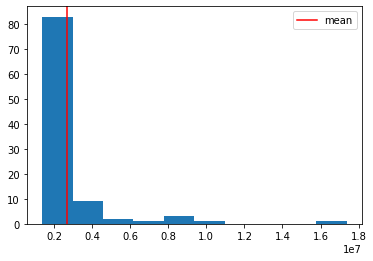

In [13]:
## duration distribution
plt.hist(max_durations['duration'])
plt.axvline(max_durations['duration'].mean() , color = 'red', label = 'mean')
plt.legend()

In [27]:
max_durations['duration'].describe()

count    1.000000e+02
mean     2.670305e+06
std      2.232800e+06
min      1.369298e+06
25%      1.557511e+06
50%      1.960095e+06
75%      2.745849e+06
max      1.736718e+07
Name: duration, dtype: float64

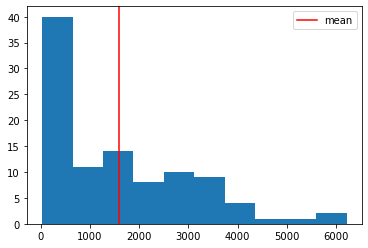

In [14]:
## total trips distribution
plt.hist(max_durations['n_trips'])
plt.axvline(max_durations['n_trips'].mean() , color = 'red', label = 'mean')
plt.legend()

In [15]:
## create a network graph 
max_durations_graph = nx.from_pandas_edgelist(max_durations, source='start_station_id', target='end_station_id', edge_attr=True, create_using = nx.MultiDiGraph())


In [16]:
## save the graph

with open("max_durations_graph.p", 'wb') as f:
    pickle.dump(max_durations_graph, f)

In [17]:
print(list(max_durations_graph.edges(data = True))[:2])
print("\n")
print("No of stations and trips : {0} , {1}".format(max_durations_graph.order() , max_durations_graph.size(weight = 'n_trips')))  ## No of stations and Number of trips 
print("No of stations and duration : {0} , {1}".format(max_durations_graph.order() , max_durations_graph.size(weight = 'duration')))  ## No of stations and Number of trips 

[(66, 62, {'start_station_id': 66, 'end_station_id': 62, 'n_trips': 111, 'duration': 17367175, 'start_station_name': 'South Van Ness at Market', 'end_station_name': '2nd at Folsom'}), (66, 66, {'start_station_id': 66, 'end_station_id': 66, 'n_trips': 368, 'duration': 2003420, 'start_station_name': 'South Van Ness at Market', 'end_station_name': 'South Van Ness at Market'})]


No of stations and trips : 49 , 159391.0
No of stations and duration : 49 , 267030462.0


By selecting the top 100 durations , the station count is reduced to 49 from 70.  
The total duration  is @ 35% of  the total duration for the entire data.   
The total trips is  22% of the total trips for the entire data.    

In [20]:
nx.number_of_selfloops(max_durations_graph)

39

In [21]:
list(nx.selfloop_edges(max_durations_graph, data=True))

[(66,
  66,
  {'start_station_id': 66,
   'end_station_id': 66,
   'n_trips': 368,
   'duration': 2003420,
   'start_station_name': 'South Van Ness at Market',
   'end_station_name': 'South Van Ness at Market'}),
 (50,
  50,
  {'start_station_id': 50,
   'end_station_id': 50,
   'n_trips': 1733,
   'duration': 10819388,
   'start_station_name': 'Harry Bridges Plaza (Ferry Building)',
   'end_station_name': 'Harry Bridges Plaza (Ferry Building)'}),
 (60,
  60,
  {'start_station_id': 60,
   'end_station_id': 60,
   'n_trips': 2092,
   'duration': 9209028,
   'start_station_name': 'Embarcadero at Sansome',
   'end_station_name': 'Embarcadero at Sansome'}),
 (35,
  35,
  {'start_station_id': 35,
   'end_station_id': 35,
   'n_trips': 894,
   'duration': 8264042,
   'start_station_name': 'University and Emerson',
   'end_station_name': 'University and Emerson'}),
 (71,
  71,
  {'start_station_id': 71,
   'end_station_id': 71,
   'n_trips': 619,
   'duration': 6511257,
   'start_station_name

There are 39 stations that  have number of trips originating and ending at them.  

In [22]:
## get the edges 
max_edges = list(nx.get_edge_attributes(max_durations_graph, 'duration').keys())
max_edges = [(u,v) for (u,v,i) in max_edges]
max_edges

[(66, 62),
 (66, 66),
 (50, 50),
 (50, 60),
 (50, 61),
 (50, 70),
 (50, 48),
 (50, 73),
 (50, 69),
 (60, 60),
 (60, 50),
 (60, 74),
 (60, 73),
 (60, 70),
 (60, 76),
 (60, 39),
 (35, 35),
 (71, 71),
 (71, 60),
 (76, 76),
 (76, 60),
 (76, 70),
 (76, 67),
 (39, 39),
 (39, 60),
 (39, 67),
 (39, 70),
 (39, 69),
 (28, 28),
 (67, 67),
 (67, 70),
 (3, 3),
 (74, 74),
 (74, 60),
 (74, 70),
 (74, 61),
 (74, 69),
 (72, 72),
 (72, 65),
 (70, 70),
 (70, 50),
 (70, 55),
 (70, 77),
 (70, 74),
 (70, 51),
 (70, 60),
 (70, 42),
 (70, 48),
 (73, 73),
 (73, 77),
 (34, 34),
 (34, 36),
 (48, 48),
 (48, 60),
 (48, 50),
 (61, 50),
 (61, 61),
 (61, 74),
 (51, 70),
 (57, 57),
 (54, 54),
 (54, 60),
 (29, 29),
 (36, 36),
 (55, 70),
 (33, 33),
 (77, 68),
 (77, 60),
 (77, 77),
 (77, 70),
 (77, 64),
 (68, 68),
 (41, 41),
 (41, 70),
 (46, 46),
 (69, 39),
 (69, 65),
 (69, 67),
 (65, 72),
 (65, 70),
 (65, 50),
 (64, 77),
 (38, 38),
 (31, 32),
 (9, 9),
 (27, 27),
 (42, 42),
 (42, 70),
 (56, 56),
 (56, 70),
 (37, 37),
 (6

In [23]:
duration_value = list(nx.get_edge_attributes(max_durations_graph, 'duration').values())
duration_value

[17367175,
 2003420,
 10819388,
 7793685,
 2913319,
 2797767,
 2375571,
 1540024,
 1434744,
 9209028,
 2903217,
 2316082,
 1715313,
 1648009,
 1598775,
 1414439,
 8264042,
 6511257,
 1988316,
 6134989,
 2321245,
 1738414,
 1512480,
 5771049,
 1799464,
 1670634,
 1466493,
 1381926,
 4551306,
 4178770,
 2431220,
 4049992,
 3967918,
 2778490,
 2582965,
 2251110,
 1514243,
 3766862,
 1559054,
 3615683,
 3036218,
 2593350,
 2216985,
 2131235,
 1954045,
 1952058,
 1418234,
 1382065,
 3328525,
 1403971,
 3056384,
 1527783,
 2932682,
 2720617,
 1396426,
 2821533,
 2142857,
 1688549,
 2844287,
 2781728,
 2734969,
 2329041,
 2711990,
 2624476,
 2309366,
 2570643,
 2371076,
 1959939,
 1912536,
 1690610,
 1434826,
 1690141,
 2361821,
 1480137,
 2113379,
 2009268,
 1972347,
 1930389,
 1448653,
 1437680,
 1400216,
 1960251,
 1929271,
 1899121,
 1838552,
 1817222,
 1804259,
 1467225,
 1751908,
 1552883,
 1732588,
 1727118,
 1724363,
 1487769,
 1689126,
 1497086,
 1495756,
 1406381,
 1399372,
 1369298

In [24]:
## create the edge label dictionary with the two lists above.
edge_lbl = {}
for i in range(len(max_edges)):
    edge_lbl[max_edges[i]] = duration_value[i]
##
edge_lbl

{(66, 62): 17367175,
 (66, 66): 2003420,
 (50, 50): 10819388,
 (50, 60): 7793685,
 (50, 61): 2913319,
 (50, 70): 2797767,
 (50, 48): 2375571,
 (50, 73): 1540024,
 (50, 69): 1434744,
 (60, 60): 9209028,
 (60, 50): 2903217,
 (60, 74): 2316082,
 (60, 73): 1715313,
 (60, 70): 1648009,
 (60, 76): 1598775,
 (60, 39): 1414439,
 (35, 35): 8264042,
 (71, 71): 6511257,
 (71, 60): 1988316,
 (76, 76): 6134989,
 (76, 60): 2321245,
 (76, 70): 1738414,
 (76, 67): 1512480,
 (39, 39): 5771049,
 (39, 60): 1799464,
 (39, 67): 1670634,
 (39, 70): 1466493,
 (39, 69): 1381926,
 (28, 28): 4551306,
 (67, 67): 4178770,
 (67, 70): 2431220,
 (3, 3): 4049992,
 (74, 74): 3967918,
 (74, 60): 2778490,
 (74, 70): 2582965,
 (74, 61): 2251110,
 (74, 69): 1514243,
 (72, 72): 3766862,
 (72, 65): 1559054,
 (70, 70): 3615683,
 (70, 50): 3036218,
 (70, 55): 2593350,
 (70, 77): 2216985,
 (70, 74): 2131235,
 (70, 51): 1954045,
 (70, 60): 1952058,
 (70, 42): 1418234,
 (70, 48): 1382065,
 (73, 73): 3328525,
 (73, 77): 1403971,


In [25]:
## sort and select the top 10 total trips 
edge_lbl_sorted = dict(sorted(edge_lbl.items(), key=lambda item: item[1] , reverse = True))
edge_lbl_sorted

{(66, 62): 17367175,
 (50, 50): 10819388,
 (60, 60): 9209028,
 (35, 35): 8264042,
 (50, 60): 7793685,
 (71, 71): 6511257,
 (76, 76): 6134989,
 (39, 39): 5771049,
 (28, 28): 4551306,
 (67, 67): 4178770,
 (3, 3): 4049992,
 (74, 74): 3967918,
 (72, 72): 3766862,
 (70, 70): 3615683,
 (73, 73): 3328525,
 (34, 34): 3056384,
 (70, 50): 3036218,
 (48, 48): 2932682,
 (50, 61): 2913319,
 (60, 50): 2903217,
 (51, 70): 2844287,
 (61, 50): 2821533,
 (50, 70): 2797767,
 (57, 57): 2781728,
 (74, 60): 2778490,
 (54, 54): 2734969,
 (48, 60): 2720617,
 (29, 29): 2711990,
 (36, 36): 2624476,
 (70, 55): 2593350,
 (74, 70): 2582965,
 (33, 33): 2570643,
 (67, 70): 2431220,
 (50, 48): 2375571,
 (77, 68): 2371076,
 (41, 41): 2361821,
 (54, 60): 2329041,
 (76, 60): 2321245,
 (60, 74): 2316082,
 (55, 70): 2309366,
 (74, 61): 2251110,
 (70, 77): 2216985,
 (61, 61): 2142857,
 (70, 74): 2131235,
 (46, 46): 2113379,
 (69, 39): 2009268,
 (66, 66): 2003420,
 (71, 60): 1988316,
 (69, 65): 1972347,
 (64, 77): 1960251,


In [26]:
## first 10 top trips 
top_10 = list(edge_lbl_sorted.keys())[:10]
edge_lbl_10 = { n : edge_lbl[n] for n in top_10}
edge_lbl_10


{(66, 62): 17367175,
 (50, 50): 10819388,
 (60, 60): 9209028,
 (35, 35): 8264042,
 (50, 60): 7793685,
 (71, 71): 6511257,
 (76, 76): 6134989,
 (39, 39): 5771049,
 (28, 28): 4551306,
 (67, 67): 4178770}

Create three sets of edges based on the edge weight i.e based on n_trips.  
This is done to display the edges in three different colors based on the total trips between stations.  


In [28]:
e_1 ={}
e_2 = {}
e_3 = {}
for k,v in edge_lbl.items():
    if v <= 2500000:
        e_1[k] = v
    elif v <= 4500000:
        e_2[k] =v
    else:
        e_3[k] =v
##
print(e_1)
print(e_2)
print(e_3)

{(66, 66): 2003420, (50, 48): 2375571, (50, 73): 1540024, (50, 69): 1434744, (60, 74): 2316082, (60, 73): 1715313, (60, 70): 1648009, (60, 76): 1598775, (60, 39): 1414439, (71, 60): 1988316, (76, 60): 2321245, (76, 70): 1738414, (76, 67): 1512480, (39, 60): 1799464, (39, 67): 1670634, (39, 70): 1466493, (39, 69): 1381926, (67, 70): 2431220, (74, 61): 2251110, (74, 69): 1514243, (72, 65): 1559054, (70, 77): 2216985, (70, 74): 2131235, (70, 51): 1954045, (70, 60): 1952058, (70, 42): 1418234, (70, 48): 1382065, (73, 77): 1403971, (34, 36): 1527783, (48, 50): 1396426, (61, 61): 2142857, (61, 74): 1688549, (54, 60): 2329041, (55, 70): 2309366, (77, 68): 2371076, (77, 60): 1959939, (77, 77): 1912536, (77, 70): 1690610, (77, 64): 1434826, (68, 68): 1690141, (41, 41): 2361821, (41, 70): 1480137, (46, 46): 2113379, (69, 39): 2009268, (69, 65): 1972347, (69, 67): 1930389, (65, 72): 1448653, (65, 70): 1437680, (65, 50): 1400216, (64, 77): 1960251, (38, 38): 1929271, (31, 32): 1899121, (9, 9): 183

In [29]:
node_list = list(e_3.keys())

display_nodes  = [n[0] for n in node_list] + [n[1] for n in node_list] 
display_nodes = list(set(display_nodes))
display_nodes

[66, 35, 71, 39, 76, 28, 50, 60, 62]

In [30]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


Assign node names i.e station names.  

In [31]:
station_name_dict = station[['id','name']].set_index(['id']).to_dict()
station_name_dict['name']

{2: 'San Jose Diridon Caltrain Station',
 3: 'San Jose Civic Center',
 4: 'Santa Clara at Almaden',
 5: 'Adobe on Almaden',
 6: 'San Pedro Square',
 7: 'Paseo de San Antonio',
 8: 'San Salvador at 1st',
 9: 'Japantown',
 10: 'San Jose City Hall',
 11: 'MLK Library',
 12: 'SJSU 4th at San Carlos',
 13: 'St James Park',
 14: 'Arena Green / SAP Center',
 16: 'SJSU - San Salvador at 9th',
 21: 'Franklin at Maple',
 22: 'Redwood City Caltrain Station',
 23: 'San Mateo County Center',
 24: 'Redwood City Public Library',
 25: 'Stanford in Redwood City',
 26: 'Redwood City Medical Center',
 27: 'Mountain View City Hall',
 28: 'Mountain View Caltrain Station',
 29: 'San Antonio Caltrain Station',
 30: 'Evelyn Park and Ride',
 31: 'San Antonio Shopping Center',
 32: 'Castro Street and El Camino Real',
 33: 'Rengstorff Avenue / California Street',
 34: 'Palo Alto Caltrain Station',
 35: 'University and Emerson',
 36: 'California Ave Caltrain Station',
 37: 'Cowper at University',
 38: 'Park at Ol

In [33]:
nx.set_node_attributes(max_durations_graph, station_name_dict['name'], "name")

In [34]:
station_names = nx.get_node_attributes(max_durations_graph, 'name')
station_names 

{66: 'South Van Ness at Market',
 62: '2nd at Folsom',
 50: 'Harry Bridges Plaza (Ferry Building)',
 60: 'Embarcadero at Sansome',
 35: 'University and Emerson',
 71: 'Powell at Post (Union Square)',
 76: 'Market at 4th',
 39: 'Powell Street BART',
 28: 'Mountain View Caltrain Station',
 67: 'Market at 10th',
 3: 'San Jose Civic Center',
 74: 'Steuart at Market',
 72: 'Civic Center BART (7th at Market)',
 70: 'San Francisco Caltrain (Townsend at 4th)',
 73: 'Grant Avenue at Columbus Avenue',
 34: 'Palo Alto Caltrain Station',
 48: 'Embarcadero at Vallejo',
 61: '2nd at Townsend',
 51: 'Embarcadero at Folsom',
 57: '5th at Howard',
 54: 'Embarcadero at Bryant',
 29: 'San Antonio Caltrain Station',
 36: 'California Ave Caltrain Station',
 55: 'Temporary Transbay Terminal (Howard at Beale)',
 33: 'Rengstorff Avenue / California Street',
 77: 'Market at Sansome',
 68: 'Yerba Buena Center of the Arts (3rd @ Howard)',
 41: 'Clay at Battery',
 46: 'Washington at Kearney',
 69: 'San Francisco 

In [35]:
display_station_names = {}
for i in display_nodes:
    display_station_names[i] = station_names[i]
    
##
display_station_names
    

{66: 'South Van Ness at Market',
 35: 'University and Emerson',
 71: 'Powell at Post (Union Square)',
 39: 'Powell Street BART',
 76: 'Market at 4th',
 28: 'Mountain View Caltrain Station',
 50: 'Harry Bridges Plaza (Ferry Building)',
 60: 'Embarcadero at Sansome',
 62: '2nd at Folsom'}

Draw the graph as follows:  
Mark the station with top most durations between stations. 
Display the top 2 groups of total durations i.e durations greater than 4500000 marked in green lines and that between 2500000 and 4500000 marked in blue lines.  

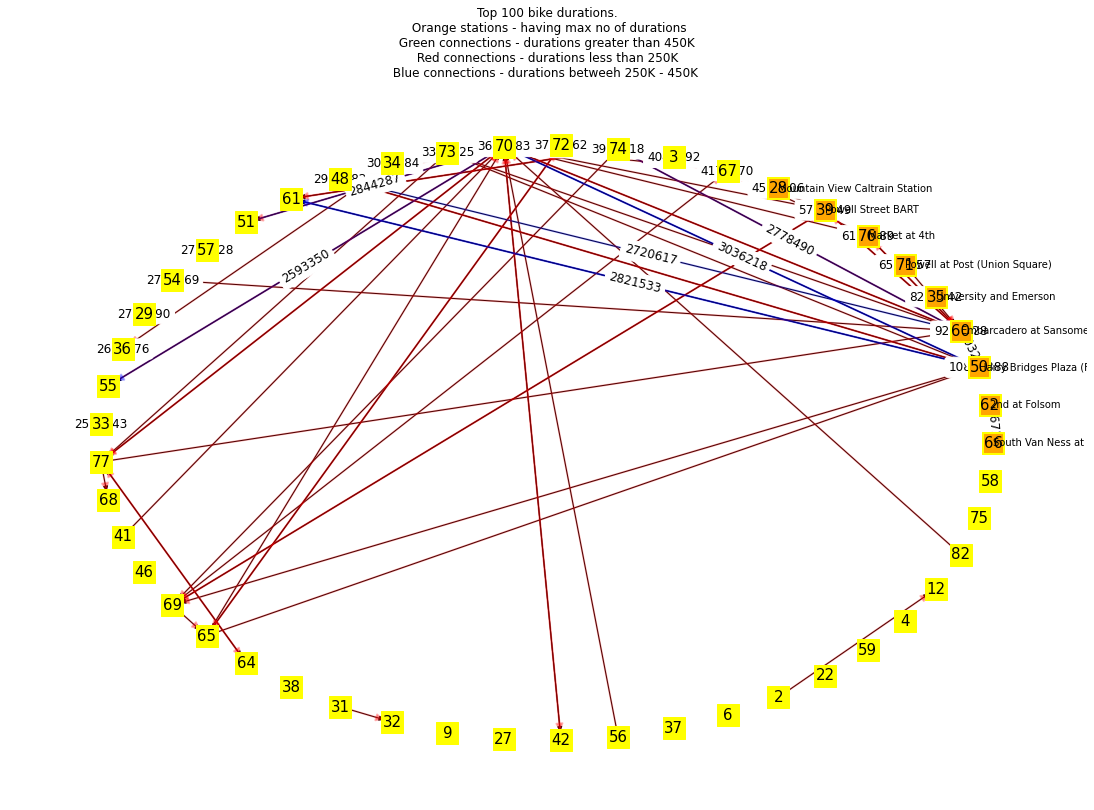

In [39]:
## plot the top  100 trips 

plt.figure(figsize = (15,10))
circ_pos = nx.circular_layout(max_durations_graph) 

#
nx.draw(max_durations_graph,circ_pos)

#
nx.draw_networkx_nodes(max_durations_graph, circ_pos,  alpha=1, node_shape = 's', node_size = 500, node_color = 'yellow')
## stations with maximum number of trips
nx.draw_networkx_nodes(max_durations_graph, circ_pos, nodelist= display_nodes  , node_color='orange', alpha=1, node_shape = 's')
#nx.draw_networkx_nodes(graph_1, circ_pos, nodelist= least_connections_nodes, node_color='pink', alpha=1, node_shape = 's')

# display edges with colors based on the total number of trips 
nx.draw_networkx_edges(max_durations_graph,circ_pos,
                       edgelist= list(e_1.keys()),
                      width=2,alpha=0.3,edge_color='red', style = 'dashed', arrowsize = 15) ## dashed line not appearing
nx.draw_networkx_edges(max_durations_graph,circ_pos,
                       edgelist= list(e_2.keys()),
                      width=2,alpha=0.3,edge_color='blue', style = 'dashed', arrowsize = 15) ## dashed line not appearing
nx.draw_networkx_edges(max_durations_graph,circ_pos,
                       edgelist= list(e_3.keys()),
                      width=2,alpha=0.3,edge_color='green', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in max_durations_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(max_durations_graph, circ_pos,font_size=15, node_shape = 's', node_size = 500)
nx.draw_networkx_labels(max_durations_graph, circ_pos,display_station_names,font_size=10, node_shape = 's', node_size = 600 , horizontalalignment = 'left', clip_on = False)
##
plt.title("Top 100 bike durations.\n Orange stations - having max no of durations\n Green connections - durations greater than 450K \n Red connections - durations less than 250K \n Blue connections - durations betweeh 250K - 450K  ")
## edge labels for top 10 trips
nx.draw_networkx_edge_labels(max_durations_graph,circ_pos,font_size=12, edge_labels = edge_lbl_10, label_pos = 0.5, color = 'red')
## edge label for the stations with second most highest trips
nx.draw_networkx_edge_labels(max_durations_graph,circ_pos,font_size=12, edge_labels = e_2, label_pos = 0.5)

plt.show()